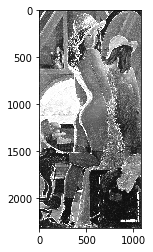

In [3]:
import cv2
import numpy as np
import scipy
from scipy import signal
import matplotlib.pyplot as plt
LENA = cv2.imread('/Users/leslie/Desktop/革命成果-学术/LENA_FULL.jpg',0) #选1为真彩色读取方式
# cv2.namedWindow("Image")
# cv2.imshow('image',LENA)
# cv2.waitKey (0)

row, colum = LENA.shape #增加channel接受色彩通道，but 'convolve2d inputs must both be 2D arrays'
LENA_f = np.copy(LENA)
LENA_f_ = LENA_f.astype('float')

#for i in range(0,2): 怎么把分别卷积的3层再合成一张图？


G_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]]) #Sobel Operator
G_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

X = scipy.signal.convolve2d(LENA_f_,G_x,'same')
Y = scipy.signal.convolve2d(LENA_f_,G_y,'same')

# X = np.convolve(G_x,LENA_f_,'same')  numpy.convolve 只支持1D卷积
# Y = np.convolve(G_y,LENA_f_,'same')
X_abs = abs(X)
Y_abs = abs(Y)
G = X_abs + Y_abs

sharp = G + LENA_f_
sharp = np.where(sharp<0,0,np.where(sharp>255,255,sharp))
sharp = sharp.astype('uint8')

plt.imshow(sharp, cmap = plt.get_cmap('gray'))
plt.show()